Nama : Muhammad Ilham F

NIM : 105219044

Praktikum K-Means

# Soal laporan akhir

- Pilih dataset lain dari link ini: https://archive.ics.uci.edu/ml/datasets.php?format=&task=clu&att=&area=&numAtt=&numIns=&type=&sort=nameUp&view=table
- Lakukan pre-processing data jika diperlukan.
- Jelaskan secara singkat mengenai isi dari dataset tersebut
- Carilah k terbaik dengan elbow method
- Tulis kesimpulan

Note : Mohon untuk memberikan keterangan dari setiap kolom kode yang dijalankan pada file .ipynb

Dataset: Dataset yang saya gunakan bernama Heart failure clinical records Data Set. Dataset dari archieve.ics.uci.edu
resource : https://archive.ics.uci.edu/ml/datasets/Heart+failure+clinical+records

Penjelasan dataset : Dataset yang saya gunakan merupakan pasien-pasien yang telah mengalami kegagalan jantung, yaitu ketika jantung tidak mampu memompa darah ke seluruh tubuh. Pasien-pasien tersebut kemudian dicatat semua gejala sebelumnya yang pernahdialami setiap pasien, seperti anemia, diabetes, tekanan darah tinggi. Dan juga dicatat status kesehatannya selama penanganan dokter seperti jumlah enzim Creatinine phosphokinase darah pasien (mcg/L), presentase darah yang dipompa jantung selama penanganan, serum ceratine (mg.dL) dan serum sodium (mEg/L). Kebiasaan pasien sebelumnya juga dicatat seperti perokok atau tidak.
Note : 0 tidak, 1 ya. Lebih jelasnya kunjungi link berikut : https://bmcmedinformdecismak.biomedcentral.com/articles/10.1186/s12911-020-1023-5. pada table 1 penjelasan semua atribut pada dataset.

In [25]:
# Load semua library yang diperlukan

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.cluster import KMeans
from ipywidgets import interact


plt.rcParams['figure.figsize'] = [20,5]

colors = np.array(sns.color_palette())

# Pre processing data

In [26]:
df = pd.read_csv('record_heart_failure_dataset.csv')
df


,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,62.0,0,61,1,38,1,155000.00,1.1,143,1,1,270,0
295,55.0,0,1820,0,38,0,270000.00,1.2,139,0,0,271,0
296,45.0,0,2060,1,60,0,742000.00,0.8,138,0,0,278,0
297,45.0,0,2413,0,38,0,140000.00,1.4,140,1,1,280,0


In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


In [28]:
df.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


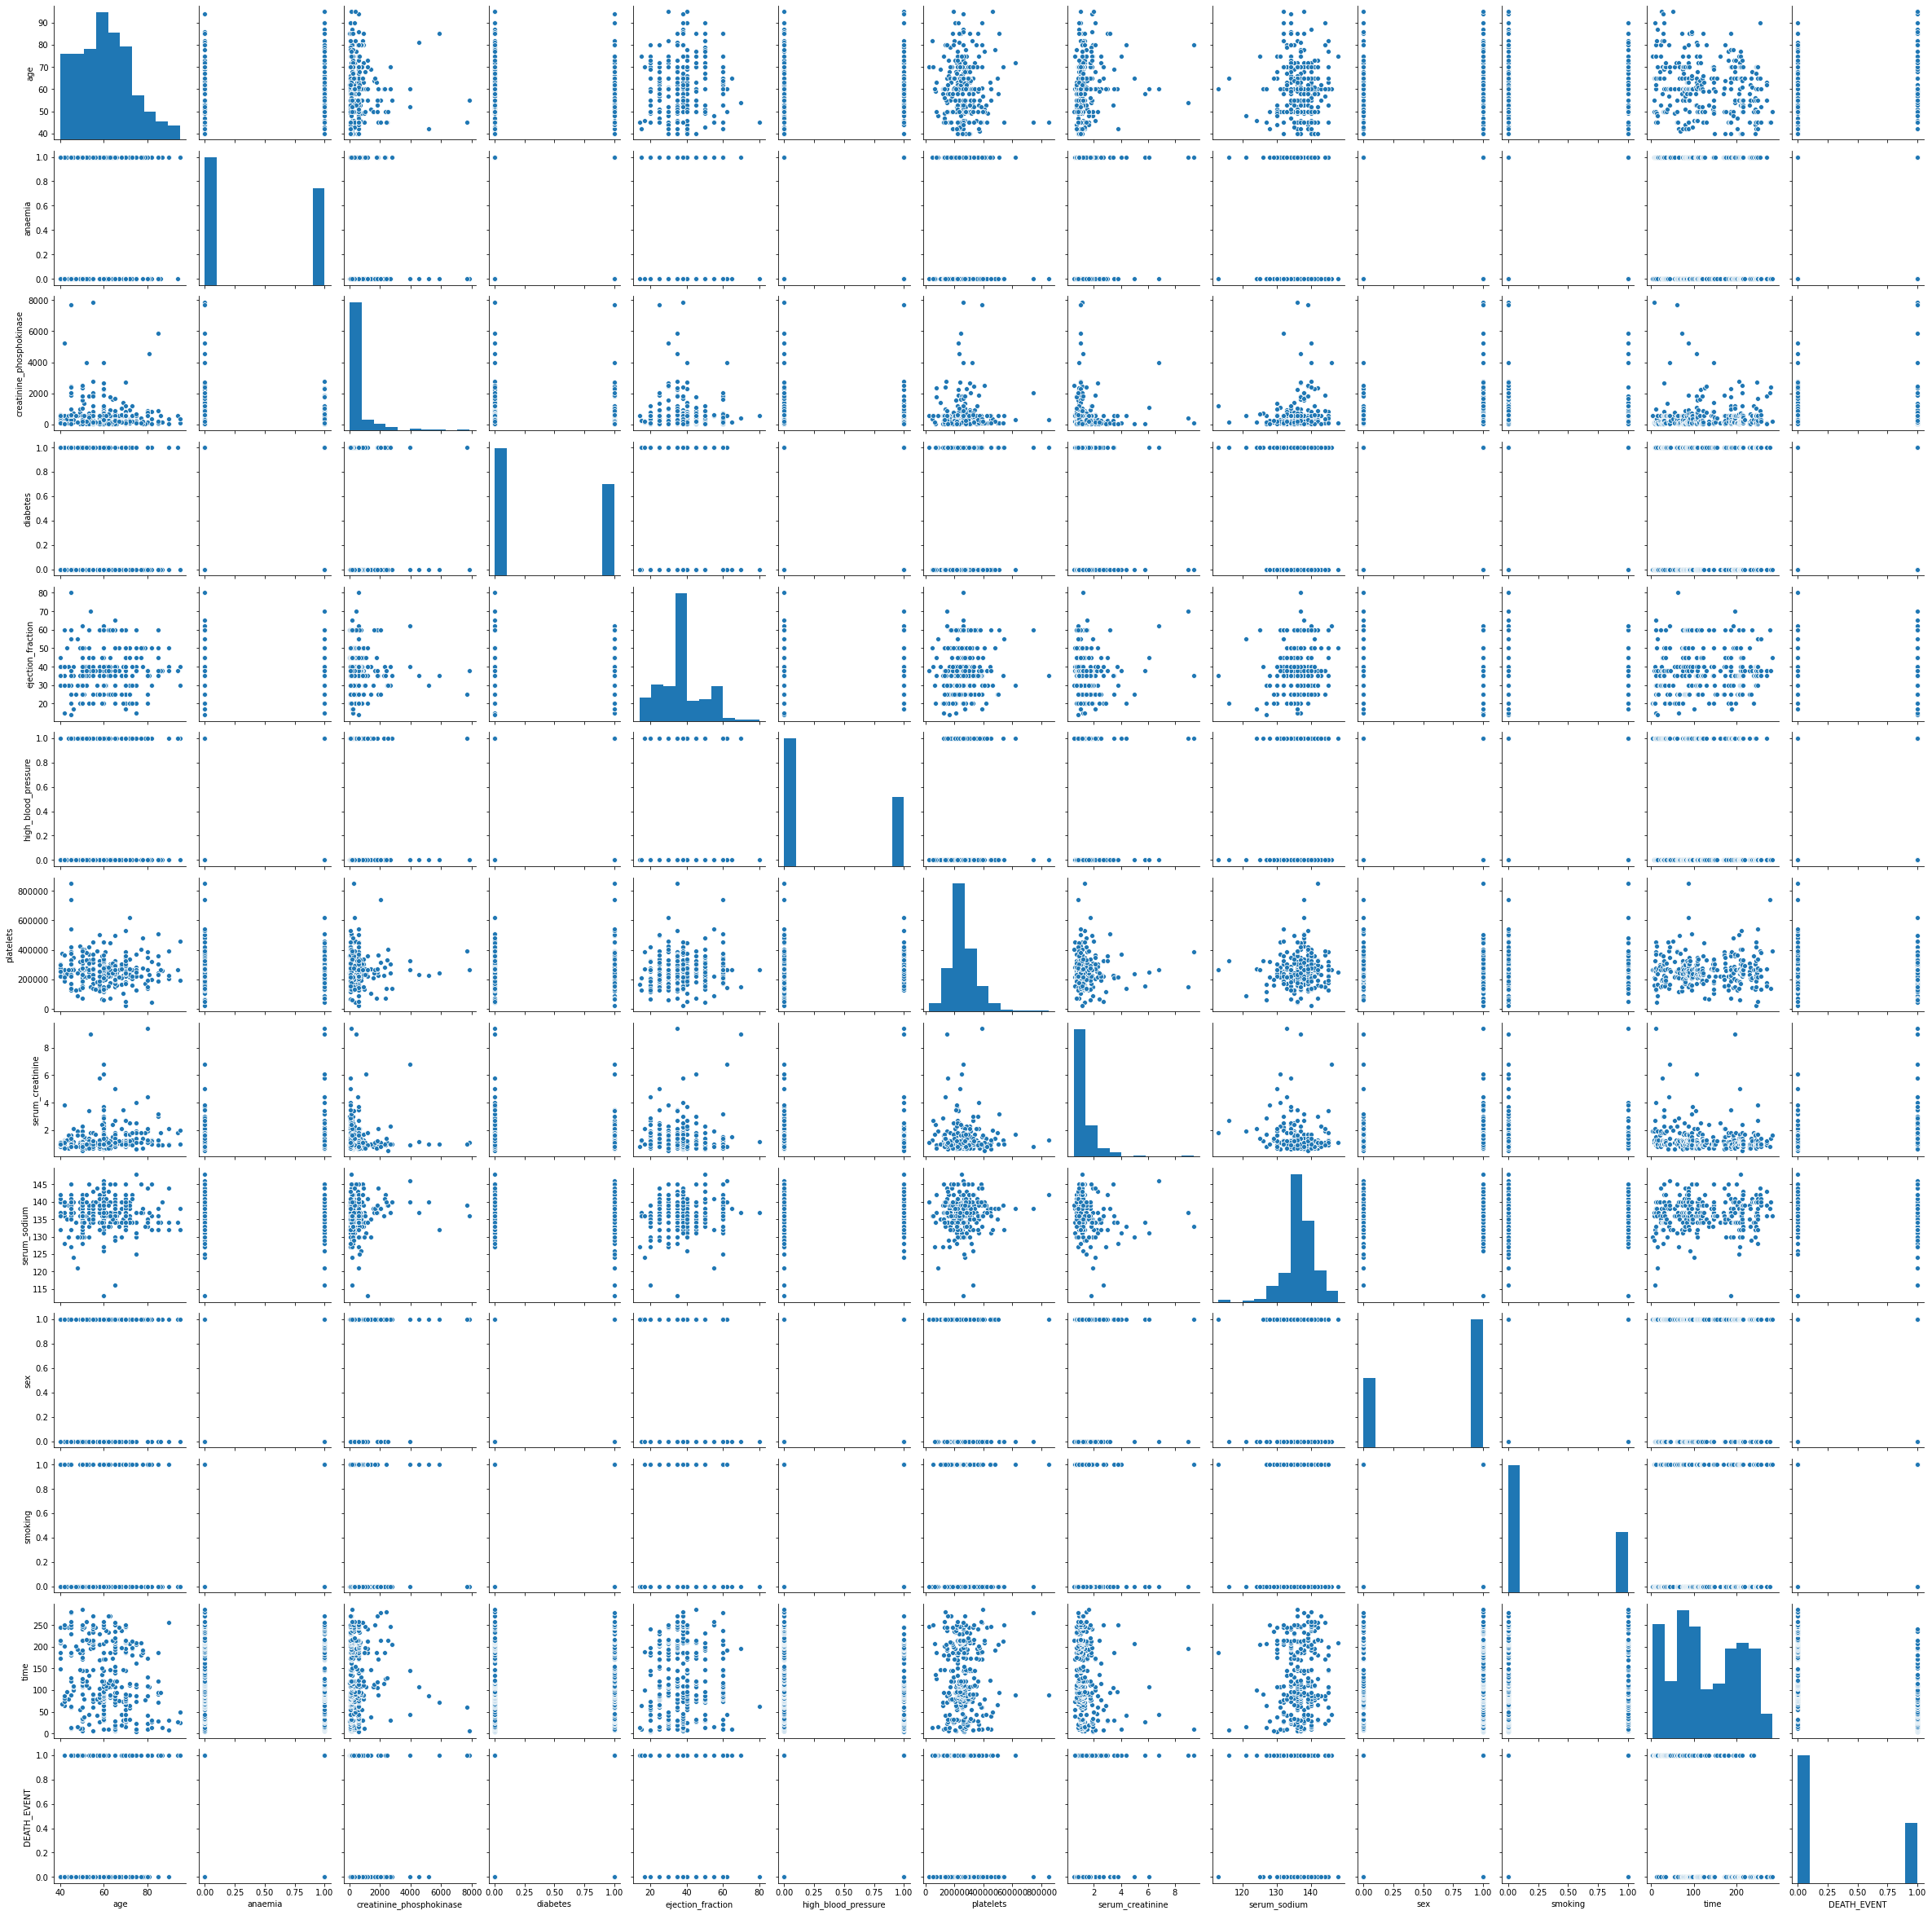

In [29]:
sns.pairplot(data=df)
plt.show()

In [7]:
#Ambil atribut yang diperlukan
heart = df[['age','creatinine_phosphokinase','ejection_fraction','serum_sodium','DEATH_EVENT']]
heart

,age,creatinine_phosphokinase,ejection_fraction,serum_sodium,DEATH_EVENT
0,75.0,582,20,130,1
1,55.0,7861,38,136,1
2,65.0,146,20,129,1
3,50.0,111,20,137,1
4,65.0,160,20,116,1
...,...,...,...,...,...
294,62.0,61,38,143,0
295,55.0,1820,38,139,0
296,45.0,2060,60,138,0
297,45.0,2413,38,140,0


In [8]:
heart.describe()

,age,creatinine_phosphokinase,ejection_fraction,serum_sodium,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.00000
mean,60.833893,581.839465,38.083612,136.625418,0.32107
std,11.894809,970.287881,11.834841,4.412477,0.46767
min,40.000000,23.000000,14.000000,113.000000,0.00000
25%,51.000000,116.500000,30.000000,134.000000,0.00000
50%,60.000000,250.000000,38.000000,137.000000,0.00000
75%,70.000000,582.000000,45.000000,140.000000,1.00000
max,95.000000,7861.000000,80.000000,148.000000,1.00000


# Visualisasikan data

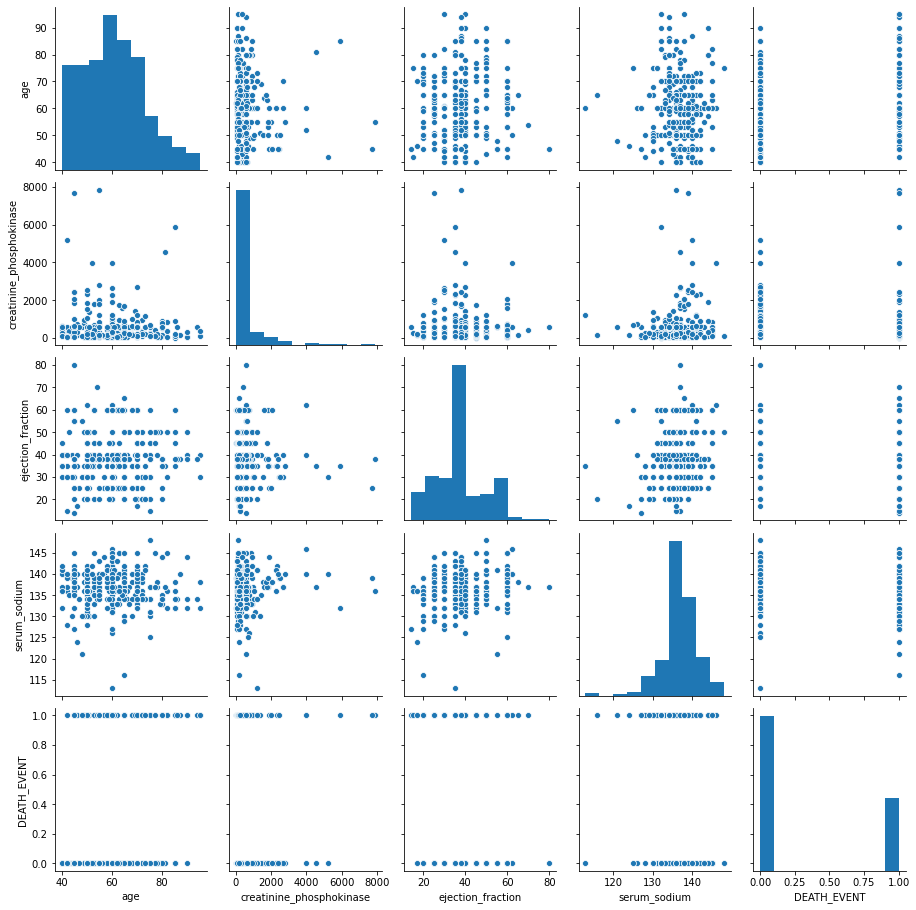

In [9]:
# Visualisasikan atribut-atribut yang sesuai dan bagus sebaran datanya
sns.pairplot(data=heart)
plt.show()

Kita akan menggunakan atribut serum sodium dengan ejection faction karena lebih optimal dan bagus.

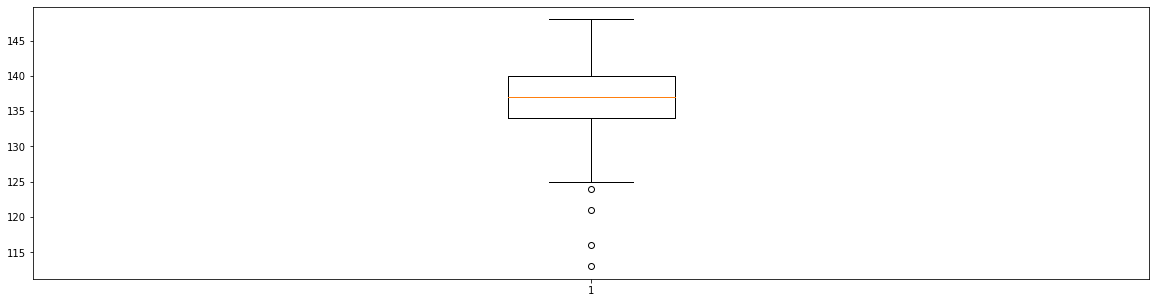

In [10]:
# Visualisasikan atribut yang ingin dipakai untuk dilihat outlier nya
plt.boxplot(heart.serum_sodium)
plt.show()

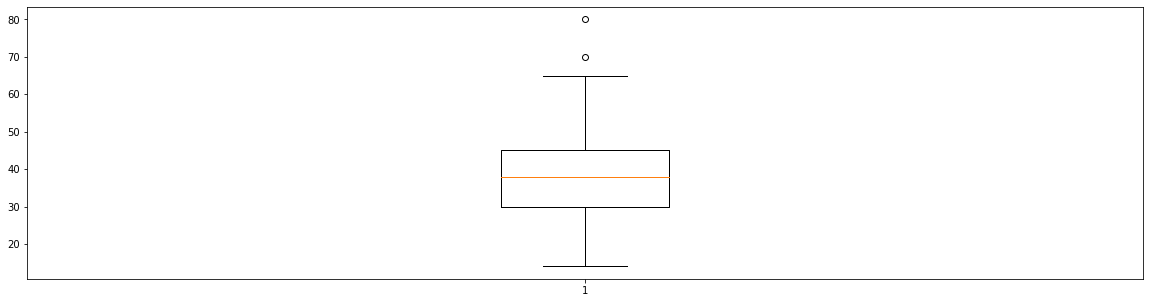

In [11]:
plt.boxplot(heart.ejection_fraction)
plt.show()

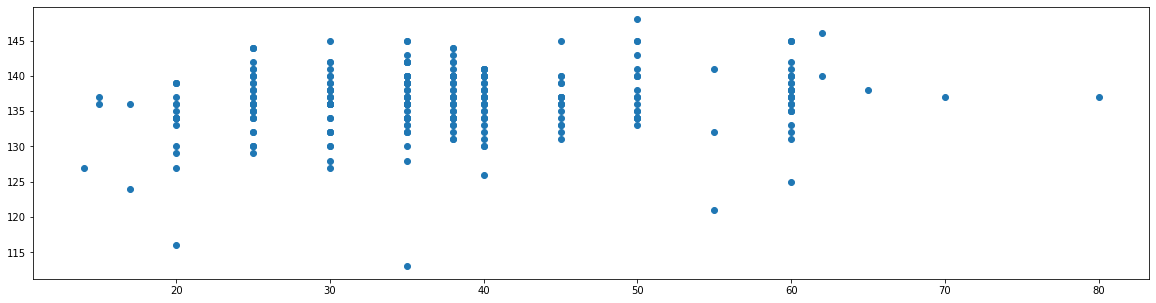

In [12]:
plt.scatter(heart.ejection_fraction,heart.serum_sodium)
plt.show()

Karena oulier nya masih di ambang normal maka tidak perlu merekayasa nilai high dan low oulier nya.

In [13]:
heart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   creatinine_phosphokinase  299 non-null    int64  
 2   ejection_fraction         299 non-null    int64  
 3   serum_sodium              299 non-null    int64  
 4   DEATH_EVENT               299 non-null    int64  
dtypes: float64(1), int64(4)
memory usage: 11.8 KB


# Pemodelan K means dari skicit learn

In [14]:
# Deklarasikan variabel x nya dari kedua atribut yang dipilih

x = heart[['ejection_fraction','serum_sodium']].values
x

array([[ 20, 130],
       [ 38, 136],
       [ 20, 129],
       [ 20, 137],
       [ 20, 116],
       [ 40, 132],
       [ 15, 137],
       [ 60, 131],
       [ 65, 138],
       [ 35, 133],
       [ 38, 131],
       [ 25, 140],
       [ 30, 137],
       [ 38, 137],
       [ 30, 138],
       [ 50, 136],
       [ 38, 140],
       [ 14, 127],
       [ 25, 140],
       [ 55, 121],
       [ 25, 137],
       [ 30, 136],
       [ 35, 140],
       [ 60, 135],
       [ 30, 134],
       [ 38, 144],
       [ 40, 138],
       [ 45, 136],
       [ 38, 134],
       [ 30, 132],
       [ 38, 134],
       [ 45, 132],
       [ 35, 128],
       [ 30, 138],
       [ 50, 140],
       [ 35, 134],
       [ 50, 134],
       [ 50, 145],
       [ 30, 137],
       [ 38, 142],
       [ 20, 134],
       [ 30, 136],
       [ 45, 139],
       [ 50, 134],
       [ 60, 142],
       [ 38, 135],
       [ 25, 130],
       [ 38, 138],
       [ 20, 133],
       [ 30, 140],
       [ 25, 138],
       [ 20, 139],
       [ 62,

In [33]:
# Menuju kepada inti model nya dari library skicit learn
kmeans = KMeans(n_clusters=5, random_state=45) #Cluster yang dipakai ada 5

kmeans.fit(x)

KMeans(n_clusters=5, random_state=45)

In [37]:
# Menentukan prediksi dari variabel x dan menyimpan semua koordinat  centroid (x,y) ke dalam variabel centroids
cluster = kmeans.fit_predict(x)
centroids = kmeans.cluster_centers_

In [36]:
# Tunjukkan koordinat-kordinat centroid nya

print('Nilai-nilai cluster : \n',centroids)

Nilai-nilai cluster : 
 [[ 27.25       137.81666667]
 [ 47.56097561 137.31707317]
 [ 60.61538462 137.35897436]
 [ 37.44       137.112     ]
 [ 22.29411765 131.05882353]]


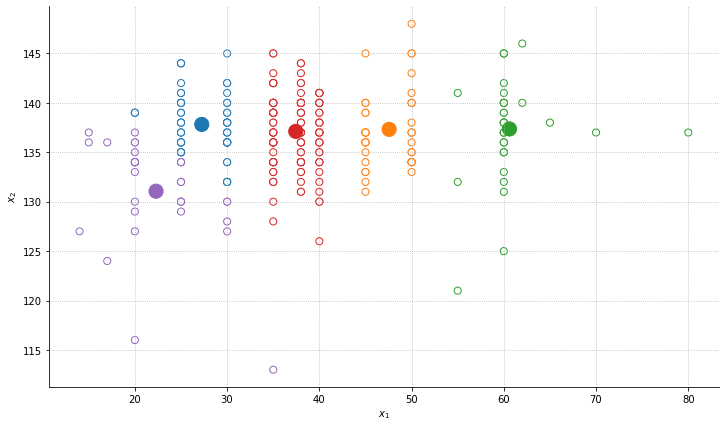

In [23]:
# Pemberian label dan clustering nya
ig, ax = plt.subplots(figsize=(12,7))
plt.scatter(*x.T, s=50, edgecolors=colors[cluster], facecolor='white')
plt.scatter(*centroids.T, s=200, c=colors[range(5)])
plt.grid(linestyle=':')
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
sns.despine()

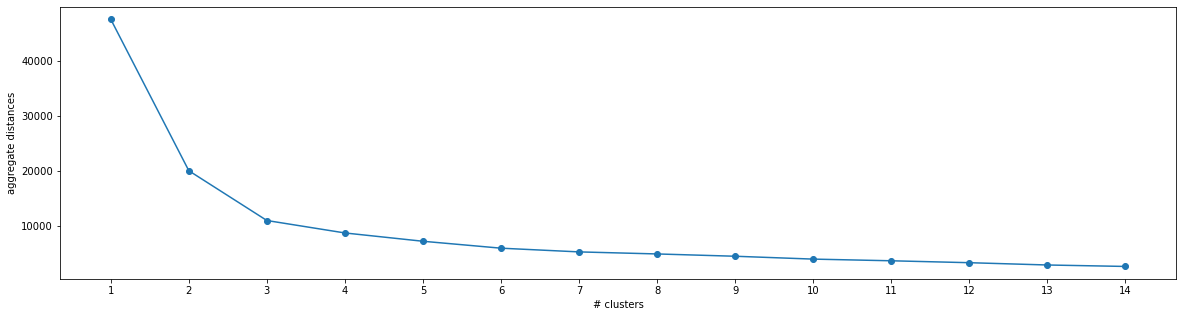

In [38]:
# Menentukan nilai k terbaik nya menggunakan nilai inertia atau total jarak antara tiap data dalam suatu klaster 
# dengan centroid nya, kemudian gunakan elbow method untuk men visualisasikan nilai k terbaik nya.
v = []
for i in range(1,15):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(x)
    v.append(kmeans.inertia_)

plt.plot(range(1,15), v, 'o-')
plt.xticks(range(1,15), range(1,15))
plt.xlabel('# clusters')
plt.ylabel('aggregate distances');

Keismpulan : Berdasarkan elbow method dengan 14 cluster di atas diketahui bahwa angka 4 cocok menjadi nilai k nya karena dari curam ke landai dimulai di angka 4. (k = 4)